In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
pd.set_option('display.max_columns', None)
import warnings

warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)


In [10]:
df = pd.read_csv('./data/all_data.csv')
df = df.dropna(subset=['Количество комнат'])
df = df.dropna(subset=['Price'])
df = df.loc[df['Price'] > 1000]
df = df.where(pd.notna(df), None)
df.reset_index(drop=True, inplace=True)
df

C:\Users\Asus\AppData\Local\Temp\ipykernel_20436\1935728433.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/all_data.csv')


,ID,Price,Количество комнат,Раздельных комнат,Площадь общая,Площадь жилая,Площадь кухни,Год постройки,Тип дома,Планировка,Балкон,Новостройка,Ремонт,Стоянка автомобиля,Собственность,Условия продажи,Номер договора,Область,Улица,Район города,Микрорайон,Координаты,Санузел,Район,Номер дома,Площадь по СНБ,Возможен торг,Высота потолков,Площадь балконов,Полы,Мебель,Видео-домофон,Телефон,Огороженная территория,Гараж,Вид этажа,Сигнализация,Год капитального ремонта,Жилой комплекс,Варианты обмена,Сельсовет,Направление,Число уровней,Аукцион,Частная,Тип населного пункта,Населеный пункт,Этаж квартиры,Всего этажей,set_type
0,2806428,33700.0,1.0,1.0,30.00,16.00,7.00,2027.0,Каркасно-блочный,Свободная планировка,Лоджия,Да,Без отделки,Есть,Частная,Чистая продажа,1/1 от 04.01.2022,Минская область,Мира просп.,Октябрьский район,Минск Мир (Minsk World),"53.8637, 27.542404",None,None,None,NaN,None,NaN,NaN,None,None,None,None,None,None,None,None,NaN,None,None,None,None,NaN,None,None,г.,Минск,11.0,15.0,train
1,3216141,79000.0,3.0,3.0,61.00,39.70,8.20,1986.0,Кирпичный,None,Лоджия застекленная,None,Евроремонт,None,Частная,Чистая продажа,23418,Брестская область,Машерова просп.,Ленинский район,Центр,"52.086084, 23.691745",Раздельный,Брестский район,None,NaN,None,NaN,NaN,None,None,None,None,None,None,None,None,NaN,None,None,None,None,NaN,None,None,г.,Брест,9.0,9.0,train
2,3264122,43500.0,2.0,2.0,45.10,26.50,6.50,1992.0,Кирпичный,None,Лоджия застекленная,None,None,None,Частная,Чистая продажа,24040,Брестская область,Дубровская ул.,Ленинский район,Дубровка,"52.133375, 23.650548",Раздельный,Брестский район,None,NaN,None,NaN,NaN,None,None,None,None,None,None,None,None,NaN,None,None,None,None,NaN,None,None,г.,Брест,5.0,5.0,train
3,2562548,92874.0,2.0,2.0,67.30,65.10,NaN,NaN,Каркасно-блочный,None,Балкон,None,None,None,Частная,Чистая продажа,None,Минская область,Ильянская ул.,Центральный район,Лебяжий (Ржавец),"53.93437, 27.469058",None,None,12,NaN,None,NaN,NaN,None,None,None,None,None,None,None,None,NaN,None,None,None,None,NaN,None,None,г.,Минск,4.0,10.0,train
4,3229926,46500.0,3.0,3.0,49.20,33.90,5.30,1973.0,Панельный,None,Балкон,None,None,None,Частная,Обмен,75/1 от 15.01.2024,Брестская область,Партизанский просп.,Московский район,Восток,"52.106411, 23.760331",None,Брестский район,None,51.6,Да,NaN,NaN,None,None,None,None,None,None,None,None,NaN,None,None,None,None,NaN,None,None,г.,Брест,5.0,5.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21466,3212250,40200.0,2.0,2.0,43.80,30.90,5.80,1967.0,Кирпичный,Стандартный проект,None,None,Хороший,None,None,Чистая продажа,380057 от 15.12.2023,Брестская область,Карбышева ул.,Ленинский район,Центр,"52.096614, 23.694638",None,Брестский район,38,43.8,None,NaN,NaN,None,None,None,None,None,None,None,None,NaN,None,None,None,None,NaN,None,None,г.,Брест,1.0,5.0,test
21467,3254049,48000.0,3.0,3.0,72.00,43.10,9.40,2008.0,Панельный,Улучшенный проект,Лоджия застекленная,None,Отличный,None,Частная,Чистая продажа,32/3 от 13.02.2024,Витебская область,Молодежная ул.,None,None,"55.506249, 28.69934",Раздельный,Полоцкий район,186/1,NaN,None,NaN,2.5,Ламинированные,None,None,Есть,None,None,None,None,NaN,None,None,None,None,NaN,None,None,г.,Новополоцк,1.0,9.0,test
21468,2955726,74000.0,2.0,2.0,50.50,30.90,7.20,1980.0,Панельный,None,Лоджия застекленная,None,Хороший,None,Частная,Чистая продажа,259/1 от 07.11.2023,Минская область,Шишкина ул.,Заводской район,Р-н ДК МАЗ,"53.86161, 27.631001",Раздельный,None,20/4,NaN,None,2.50,NaN,None,None,None,None,None,None,None,None,NaN,None,None,None,None,NaN,None,None,г.,Минск,2.0,12.0,train
21469,3212243,45000.0,4.0,4.0,74.22,50.97,7.59,1988.0,Кирпичный,None,2 лоджии,None,None,None,Частная,Чистая продажа,26/21 от 15.12.2023,Гомельская область,17-й м-н,None,None,"52.892256, 30.037813",Раздельный,Жлобинский район,15,NaN,None,2.57,NaN,None,None,None,Non

In [11]:
df['Новостройка'] = df.apply(lambda x: 1 if x['Год постройки'] > 2022 and pd.isnull(x['Новостройка']) else x['Новостройка'], axis=1)

<Axes: >

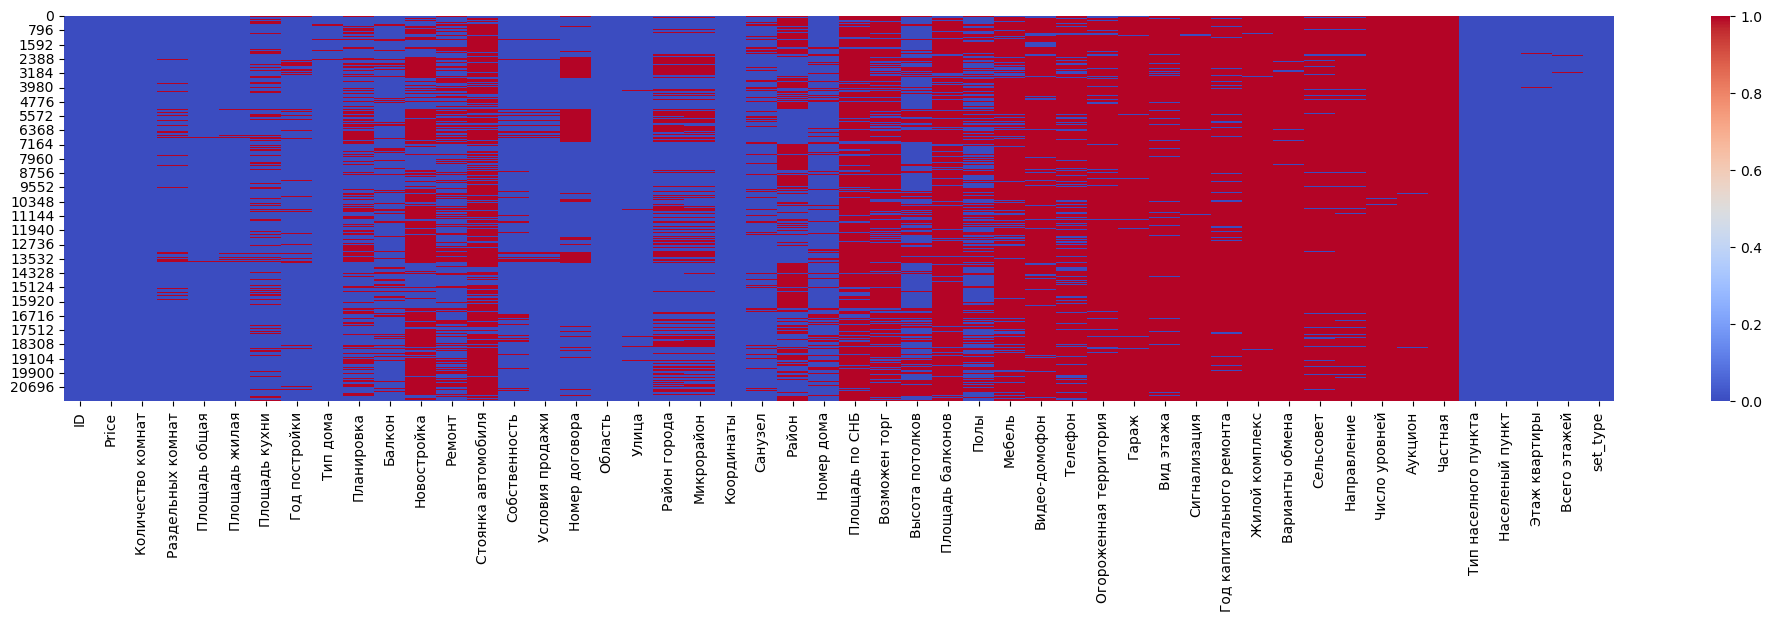

In [12]:
plt.figure(figsize=(25, 5))
sns.heatmap(df.isna(), cmap='coolwarm')

In [13]:
df['Раздельных комнат'] = df['Раздельных комнат'].fillna(df['Количество комнат'])

mastim = -1
df['Площадь общая'] = df['Площадь общая'].fillna(df['Площадь общая'].mean())
df['Площадь жилая'] = df['Площадь жилая'].fillna(mastim)
df['Площадь кухни'] = df['Площадь кухни'].fillna(mastim)
df['Площадь по СНБ'] = df['Площадь по СНБ'].fillna(mastim)
df['Площадь балконов'] = df['Площадь балконов'].fillna(mastim)

df['Год постройки'] = df['Год постройки'].fillna(df['Год постройки'].median())

df['Высота потолков'] = df['Высота потолков'].fillna(df['Высота потолков'].median())

df["Этаж квартиры"] = df["Этаж квартиры"].fillna(df["Этаж квартиры"].median())
df["Всего этажей"] = df["Всего этажей"].fillna(df["Всего этажей"].median())

In [14]:
df['Планировка']= df['Планировка'].fillna('unknow')
df['Балкон']= df['Балкон'].fillna('unknow')
df['Санузел']= df['Санузел'].fillna('unknow')
df['Полы']= df['Полы'].fillna('unknow')
df['Вид этажа']= df['Вид этажа'].fillna('usual_floor')
df['Число уровней']= df['Число уровней'].fillna(1)
df['Год капитального ремонта']= df['Год капитального ремонта'].fillna(0)
df['Собственность']= df['Собственность'].fillna('unknow')   # алены фитча

In [15]:
df['Новостройка'] = df['Новостройка'].apply(lambda x: 1 if x == 'Да' else 0)

df['Ремонт']= df['Ремонт'].fillna('Без отделки')
df['not_finish'] = df['Ремонт'].apply(lambda x: 1 if x == 'Без отделки' else 0)
df['just_finish'] =  df['Ремонт'].apply(lambda x: 1 if x == 'Строительная отделка' else 0)

type_of_renovation = ['Хороший', 'Отличный', 'Евроремонт', 'Нормальный', 'Евроремонт', 'Удовлетворительный']
dreadful = ['Плохое состояние', 'Аварийное состояние']

df['has_renovation'] = df['Ремонт'].apply(lambda x: 1 if x in type_of_renovation else 0)
df['condition_dreadful'] = df['Ремонт'].apply(lambda x: 1 if x in dreadful else 0)

df['Стоянка автомобиля'] = df['Стоянка автомобиля'].apply(lambda x: 1 if x == 'Есть' else 0)
df['Мебель'] = df['Мебель'].apply(lambda x: 1 if x == 'Есть' else 0)

df['Видео-домофон'] = df['Видео-домофон'].apply(lambda x: 1 if x == 'Есть' else 0)

df['Телефон'] = df['Телефон'].apply(lambda x: 0 if x == None else 1)

df['Огороженная территория'] = df['Огороженная территория'].apply(lambda x: 1 if x == 'Есть' else 0)

df['Гараж'] = df['Гараж'].apply(lambda x: 1 if x == 'Есть' else 0)

df['Сигнализация'] = df['Сигнализация'].apply(lambda x: 1 if x == 'Есть' else 0)

df['time_after_renovation'] = df.apply(lambda x: x['Год капитального ремонта'] - x['Год постройки'] if x['Год капитального ремонта'] - x['Год постройки']> 0 else 0,axis=1)
df['Жилой комплекс'] = df['Жилой комплекс'].apply(lambda x: 1 if x is not None else 0)

df['first_floor'] = df['Этаж квартиры'].apply(lambda x: 1 if x == 1 else 0)
df['last_floor'] = df.apply(lambda x: 1 if x['Этаж квартиры'] == x['Всего этажей'] else 0,axis=1)

In [16]:
df

,ID,Price,Количество комнат,Раздельных комнат,Площадь общая,Площадь жилая,Площадь кухни,Год постройки,Тип дома,Планировка,Балкон,Новостройка,Ремонт,Стоянка автомобиля,Собственность,Условия продажи,Номер договора,Область,Улица,Район города,Микрорайон,Координаты,Санузел,Район,Номер дома,Площадь по СНБ,Возможен торг,Высота потолков,Площадь балконов,Полы,Мебель,Видео-домофон,Телефон,Огороженная территория,Гараж,Вид этажа,Сигнализация,Год капитального ремонта,Жилой комплекс,Варианты обмена,Сельсовет,Направление,Число уровней,Аукцион,Частная,Тип населного пункта,Населеный пункт,Этаж квартиры,Всего этажей,set_type,not_finish,just_finish,has_renovation,condition_dreadful,time_after_renovation,first_floor,last_floor
0,2806428,33700.0,1.0,1.0,30.00,16.00,7.00,2027.0,Каркасно-блочный,Свободная планировка,Лоджия,1,Без отделки,1,Частная,Чистая продажа,1/1 от 04.01.2022,Минская область,Мира просп.,Октябрьский район,Минск Мир (Minsk World),"53.8637, 27.542404",unknow,None,None,-1.0,None,2.70,-1.0,unknow,0,0,0,0,0,usual_floor,0,0.0,0,None,None,None,1.0,None,None,г.,Минск,11.0,15.0,train,1,0,0,0,0.0,0,0
1,3216141,79000.0,3.0,3.0,61.00,39.70,8.20,1986.0,Кирпичный,unknow,Лоджия застекленная,0,Евроремонт,0,Частная,Чистая продажа,23418,Брестская область,Машерова просп.,Ленинский район,Центр,"52.086084, 23.691745",Раздельный,Брестский район,None,-1.0,None,2.70,-1.0,unknow,0,0,0,0,0,usual_floor,0,0.0,0,None,None,None,1.0,None,None,г.,Брест,9.0,9.0,train,0,0,1,0,0.0,0,1
2,3264122,43500.0,2.0,2.0,45.10,26.50,6.50,1992.0,Кирпичный,unknow,Лоджия застекленная,0,Без отделки,0,Частная,Чистая продажа,24040,Брестская область,Дубровская ул.,Ленинский район,Дубровка,"52.133375, 23.650548",Раздельный,Брестский район,None,-1.0,None,2.70,-1.0,unknow,0,0,0,0,0,usual_floor,0,0.0,0,None,None,None,1.0,None,None,г.,Брест,5.0,5.0,train,1,0,0,0,0.0,0,1
3,2562548,92874.0,2.0,2.0,67.30,65.10,-1.00,2010.0,Каркасно-блочный,unknow,Балкон,0,Без отделки,0,Частная,Чистая продажа,None,Минская область,Ильянская ул.,Центральный район,Лебяжий (Ржавец),"53.93437, 27.469058",unknow,None,12,-1.0,None,2.70,-1.0,unknow,0,0,0,0,0,usual_floor,0,0.0,0,None,None,None,1.0,None,None,г.,Минск,4.0,10.0,train,1,0,0,0,0.0,0,0
4,3229926,46500.0,3.0,3.0,49.20,33.90,5.30,1973.0,Панельный,unknow,Балкон,0,Без отделки,0,Частная,Обмен,75/1 от 15.01.2024,Брестская область,Партизанский просп.,Московский район,Восток,"52.106411, 23.760331",unknow,Брестский район,None,51.6,Да,2.70,-1.0,unknow,0,0,0,0,0,usual_floor,0,0.0,0,None,None,None,1.0,None,None,г.,Брест,5.0,5.0,train,1,0,0,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21466,3212250,40200.0,2.0,2.0,43.80,30.90,5.80,1967.0,Кирпичный,Стандартный проект,unknow,0,Хороший,0,unknow,Чистая продажа,380057 от 15.12.2023,Брестская область,Карбышева ул.,Ленинский район,Центр,"52.096614, 23.694638",unknow,Брестский район,38,43.8,None,2.70,-1.0,unknow,0,0,0,0,0,usual_floor,0,0.0,0,None,None,None,1.0,None,None,г.,Брест,1.0,5.0,test,0,0,1,0,0.0,1,0
21467,3254049,48000.0,3.0,3.0,72.00,43.10,9.40,2008.0,Панельный,Улучшенный проект,Лоджия застекленная,0,Отличный,0,Частная,Чистая продажа,32/3 от 13.02.2024,Витебская область,Молодежная ул.,None,None,"55.506249, 28.69934",Раздельный,Полоцкий район,186/1,-1.0,None,2.70,2.5,Ламинированные,0,0,1,0,0,usual_floor,0,0.0,0,None,None,None,1.0,None,None,г.,Новополоцк,1.0,9.0,test,0,0,1,0,0.0,1,0
21468,2955726,74000.0,2.0,2.0,50.50,30.90,7.20,1980.0,Панельный,unknow,Лоджия застекленная,0,Хороший,0,Частная,Чистая продажа,259/1 от 07.11.2023,Минская область,Шишкина ул.,Заводской район,Р-н ДК МАЗ,"53.86161, 27.631001",Раздельный,None,20/4,-1.0,None,2.50,-1.0,unknow,0,0,0,0,0,usual_floor,0,0.0,0,None,None,None,1.0,None,None,г.,Минск,2.0,12.0,train,0,0,1,0,0.0,0,0
21469,3212243,45000.0,4.0,4.0,74.22,50.97,7.59,1988.0,Кирпичный,unknow,2 лоджии,0,

# Label encoding

In [17]:
def label_encode_dataframe(df, columns):
    """
    Label encodes categorical columns in a DataFrame.

    Parameters:
    df (pandas.DataFrame): DataFrame to be encoded.
    columns (list): List of column names to be label encoded.

    Returns:
    df (pandas.DataFrame): DataFrame with label encoded columns.
    encoders (dict): Dictionary containing fitted LabelEncoders for each column.
    """
    encoders = {}
    for column in columns:
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])
        encoders[column] = encoder
    return df, encoders

# Список столбцов для кодирования
columns_to_encode = ['Балкон', 'Ремонт']


# Применяем кодирование и получаем DataFrame и словарь с LabelEncoders
df, encoders = label_encode_dataframe(df, columns_to_encode)


# One-Hot encoding

In [18]:
encoder = OneHotEncoder(sparse_output=False)

categorical_features = ['Планировка', 'Тип дома', 'Санузел', 'Полы', 'Вид этажа', 'Число уровней', 'Собственность'] # 'Собственность',

encoded = pd.DataFrame(
    data=encoder.fit_transform(df[categorical_features]),
    columns=encoder.get_feature_names_out()
)

df = df.drop(categorical_features, axis=1)
df = pd.concat([df, encoded], axis=1)

In [19]:
df

,ID,Price,Количество комнат,Раздельных комнат,Площадь общая,Площадь жилая,Площадь кухни,Год постройки,Балкон,Новостройка,Ремонт,Стоянка автомобиля,Условия продажи,Номер договора,Область,Улица,Район города,Микрорайон,Координаты,Район,Номер дома,Площадь по СНБ,Возможен торг,Высота потолков,Площадь балконов,Мебель,Видео-домофон,Телефон,Огороженная территория,Гараж,Сигнализация,Год капитального ремонта,Жилой комплекс,Варианты обмена,Сельсовет,Направление,Аукцион,Частная,Тип населного пункта,Населеный пункт,Этаж квартиры,Всего этажей,set_type,not_finish,just_finish,has_renovation,condition_dreadful,time_after_renovation,first_floor,last_floor,Планировка_unknow,Планировка_Брежневка,Планировка_Малосемейка,Планировка_Новостройка,Планировка_Пентхаус,Планировка_Свободная планировка,Планировка_Сталинка,Планировка_Стандартный проект,Планировка_Студия,Планировка_Таунхаус,Планировка_Улучшенный проект,Планировка_Хрущевка,Планировка_Чешский проект,Тип дома_Блок-комнаты,Тип дома_Бревенчатый,Тип дома_Каркасно-блочный,Тип дома_Кирпичный,Тип дома_Монолитный,Тип дома_Панельный,Тип дома_Силикатные блоки,Тип дома_None,Санузел_2 и более,Санузел_3 сан.узла,Санузел_4 сан.узла,Санузел_unknow,Санузел_Раздельный,Санузел_Совмещенный,Полы_unknow,Полы_Бетонная стяжка,Полы_ДСП,Полы_Деревянные,Полы_Ковровое покрытие,Полы_Ламинированные,Полы_Линолеум,Полы_Паркет,Полы_Плитка,Вид этажа_usual_floor,Вид этажа_Первый-высокий,Вид этажа_Первый-низкий,Вид этажа_Технический этаж,Число уровней_1.0,Число уровней_2.0,Число уровней_3.0,Собственность_unknow,Собственность_Гос.-приватизированная,Собственность_Государственная,Собственность_Долевое строительство,Собственность_Жилищные облигации,Собственность_Частная
0,2806428,33700.0,1.0,1.0,30.00,16.00,7.00,2027.0,19,1,1,1,Чистая продажа,1/1 от 04.01.2022,Минская область,Мира просп.,Октябрьский район,Минск Мир (Minsk World),"53.8637, 27.542404",None,None,-1.0,None,2.70,-1.0,0,0,0,0,0,0,0.0,0,None,None,None,None,None,г.,Минск,11.0,15.0,train,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3216141,79000.0,3.0,3.0,61.00,39.70,8.20,1986.0,20,0,2,0,Чистая продажа,23418,Брестская область,Машерова просп.,Ленинский район,Центр,"52.086084, 23.691745",Брестский район,None,-1.0,None,2.70,-1.0,0,0,0,0,0,0,0.0,0,None,None,None,None,None,г.,Брест,9.0,9.0,train,0,0,1,0,0.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3264122,43500.0,2.0,2.0,45.10,26.50,6.50,1992.0,20,0,1,0,Чистая продажа,24040,Брестская область,Дубровская ул.,Ленинский район,Дубровка,"52.133375, 23.650548",Брестский район,None,-1.0,None,2.70,-1.0,0,0,0,0,0,0,0.0,0,None,None,None,None,None,г.,Брест,5.0,5.0,train,1,0,0,0,0.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2562548,92874.0,2.0,2.0,67.30,65.10,-1.00,2010.0,13,0,1,0,Чистая продажа,None,Минская область,Ильянская ул.,Центральный район,Лебяжий (Ржавец),"53.93437, 27.469058",None,12,-1.0,None,2.70,-1.0,0,0,0,0,0,0,0.0,0,None,None,None,None,None,г.,Минск,4.0,10.0,train,1,0,0,0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3229926,46500.0,3.0,3.0,49.20,33.90,5.30,1973.0,13,0,1,0,Обмен,75/1 от 15.01.2024,Брестская область,Партизанский просп.,Московский район,Восток,"52.106411, 23.760331",Брестский район,None,51.6,Да,2.70,-1.0,0,0,0,0,0,0,0.0,0,None,None,None,None,None,г.,Брест,5.0,5.0,train,1,0,0,0,0.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,

In [20]:
df.to_csv('./data/data_after_my_pipline.csv',index=False)